<a href="https://colab.research.google.com/github/imennsiri/Adani-Stock-Forecasting/blob/main/Adani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adani


## libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Loading Data


In [3]:
df=pd.read_csv('adani.csv')
df.head()

,timestamp,symbol,company,open,high,low,close,volume,dividends,stock_splits
0,1743705000000000000,ACC,ACC Limited,1990.000000,1993.900024,1953.699951,1966.300049,111739,0.0,0.0
1,1743705000000000000,ADANIPORTS,Adani Ports and Special Economic Zone Limited,1196.000000,1200.099976,1143.000000,1148.349976,1785093,0.0,0.0
2,1743705000000000000,ADANIGREEN,Adani Green Energy Limited,949.950012,956.000000,917.650024,923.799988,3226540,0.0,0.0
3,1743705000000000000,ADANIENSOL,Adani Energy Solutions Limited,881.099976,884.700012,852.099976,859.400024,1475762,0.0,0.0
4,1743705000000000000,ADANIENT,Adani Enterprises Limited,2394.949951,2410.050049,2315.500000,2334.649902,1219733,0.0,0.0


In [4]:
df.columns

Index(['timestamp', 'symbol', 'company', 'open', 'high', 'low', 'close',
       'volume', 'dividends', 'stock_splits'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39332 entries, 0 to 39331
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     39332 non-null  int64  
 1   symbol        39332 non-null  object 
 2   company       39332 non-null  object 
 3   open          39332 non-null  float64
 4   high          39332 non-null  float64
 5   low           39332 non-null  float64
 6   close         39332 non-null  float64
 7   volume        39332 non-null  int64  
 8   dividends     39332 non-null  float64
 9   stock_splits  39332 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 3.0+ MB


In [6]:
df.describe()

,timestamp,open,high,low,close,volume,dividends,stock_splits
count,3.933200e+04,39332.000000,39332.000000,39332.000000,39332.000000,3.933200e+04,39332.000000,39332.000000
mean,1.446027e+18,433.710441,440.900412,425.645680,432.999433,3.310068e+06,0.014806,0.000305
std,1.981677e+17,644.990292,654.722742,633.329810,643.790587,7.425422e+06,0.475411,0.037052
min,1.025462e+18,-0.011107,-0.011148,-0.010666,-0.011024,0.000000e+00,0.000000,0.000000
25%,1.285785e+18,56.500000,58.000000,55.099998,56.450001,3.059338e+05,0.000000,0.000000
50%,1.466015e+18,137.400549,140.232512,134.482992,137.100677,1.185212e+06,0.000000,0.000000
75%,1.621363e+18,524.314972,535.294438,512.878444,523.287506,3.520584e+06,0.000000,0.000000
max,1.743705e+18,4169.146469,4184.125438,4060.698718,4159.459961,2.421999e+08,58.000000,5.000000


## Correlation Of Features

In [8]:
numeric_df = df.select_dtypes(include=np.number)
corel = numeric_df.corr()
corel

,timestamp,open,high,low,close,volume,dividends,stock_splits
timestamp,1.000000,0.437811,0.438042,0.437507,0.437585,0.091347,-0.001636,-0.009729
open,0.437811,1.000000,0.999774,0.999640,0.999523,-0.086585,0.028690,-0.004371
high,0.438042,0.999774,1.000000,0.999510,0.999742,-0.084021,0.028615,-0.004370
low,0.437507,0.999640,0.999510,1.000000,0.999763,-0.088850,0.029086,-0.004385
close,0.437585,0.999523,0.999742,0.999763,1.000000,-0.086033,0.028880,-0.004390
volume,0.091347,-0.086585,-0.084021,-0.088850,-0.086033,1.000000,-0.006125,-0.001858
dividends,-0.001636,0.028690,0.028615,0.029086,0.028880,-0.006125,1.000000,-0.000256
stock_splits,-0.009729,-0.004371,-0.004370,-0.004385,-0.004390,-0.001858,-0.000256,1.000000


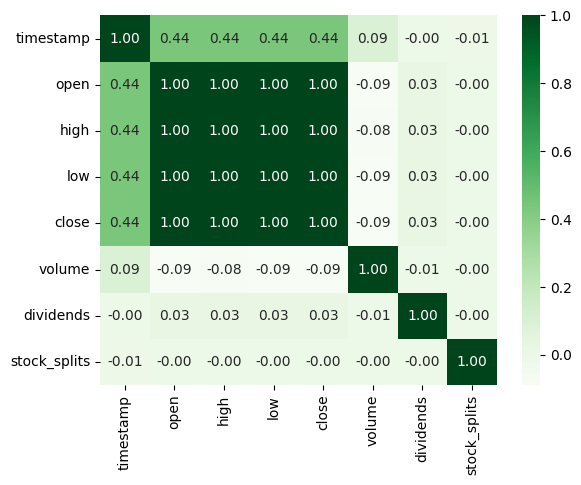

In [9]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

## Exploratory Data Analysis


### Distribution of Plots

<Figure size 1200x600 with 0 Axes>

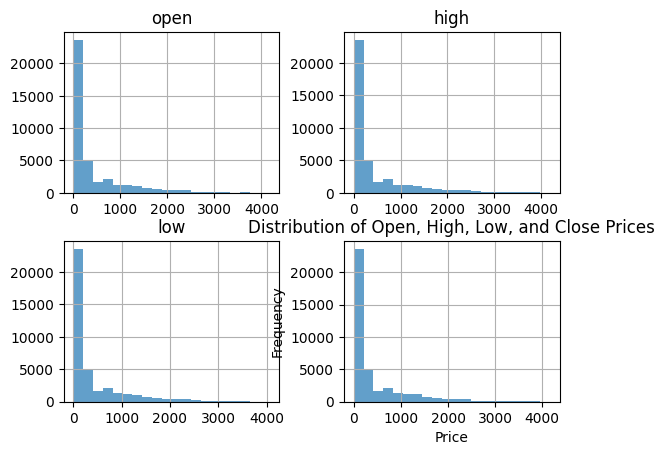

In [10]:
plt.figure(figsize=(12, 6))
df[['open', 'high', 'low', 'close']].hist(bins=20, alpha=0.7)
plt.title('Distribution of Open, High, Low, and Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### TSA

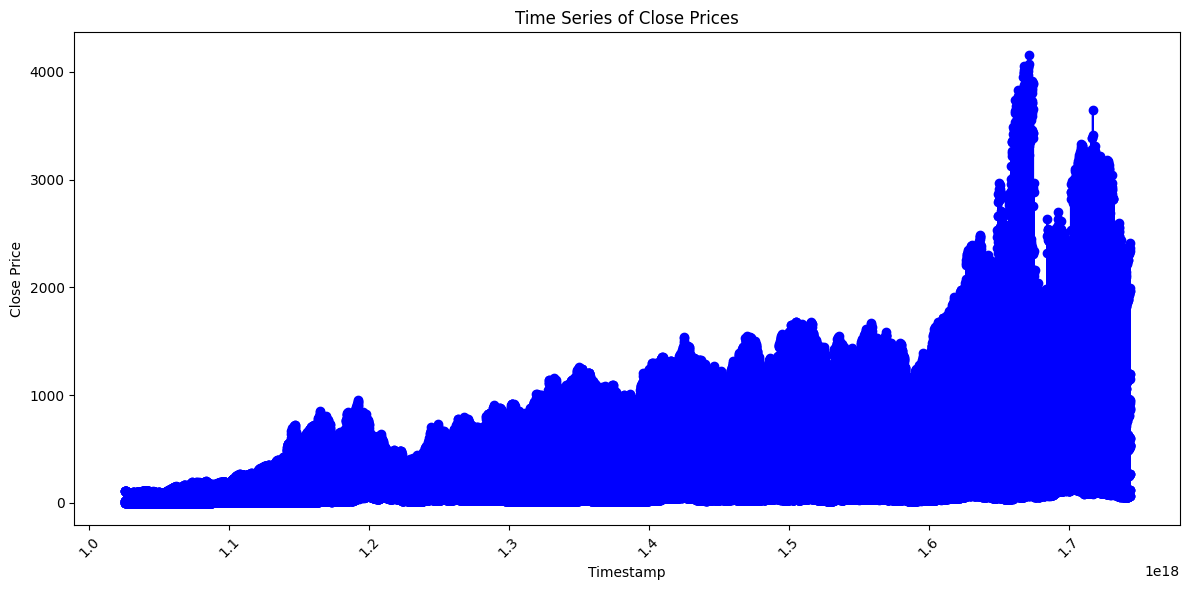

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Close Prices')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Volume Analysis

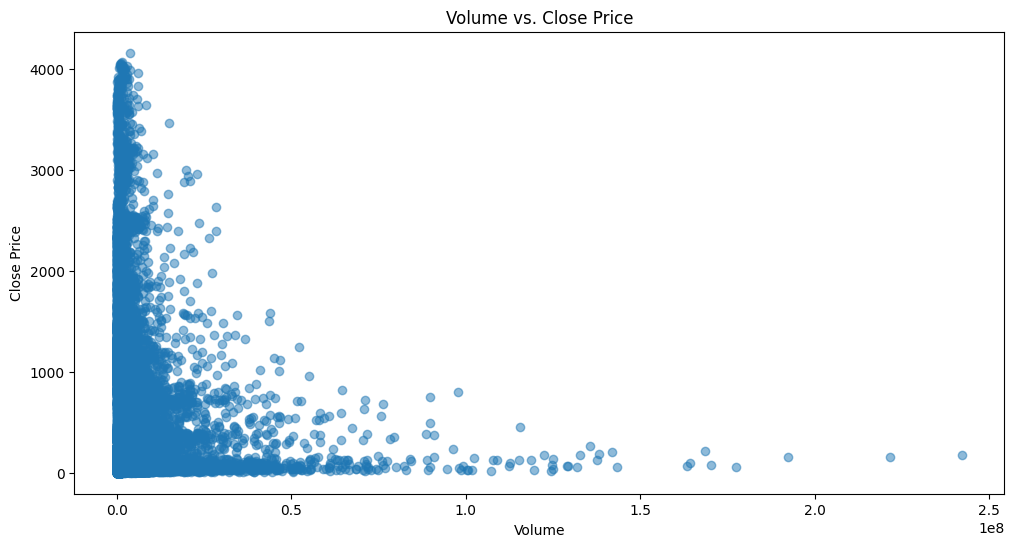

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(df['volume'], df['close'], alpha=0.5)
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


### Close vs Volume

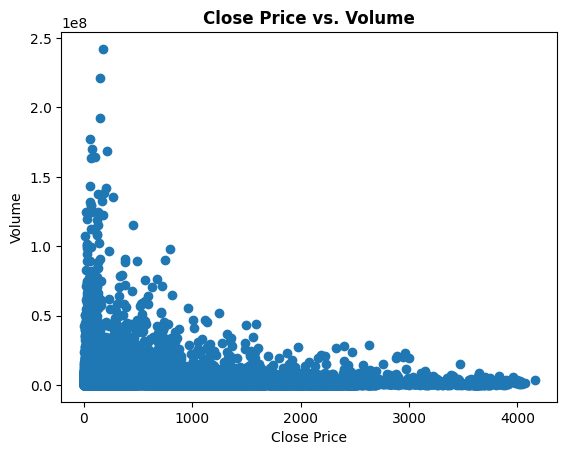

In [13]:
plt.scatter(df['close'], df['volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

### MA

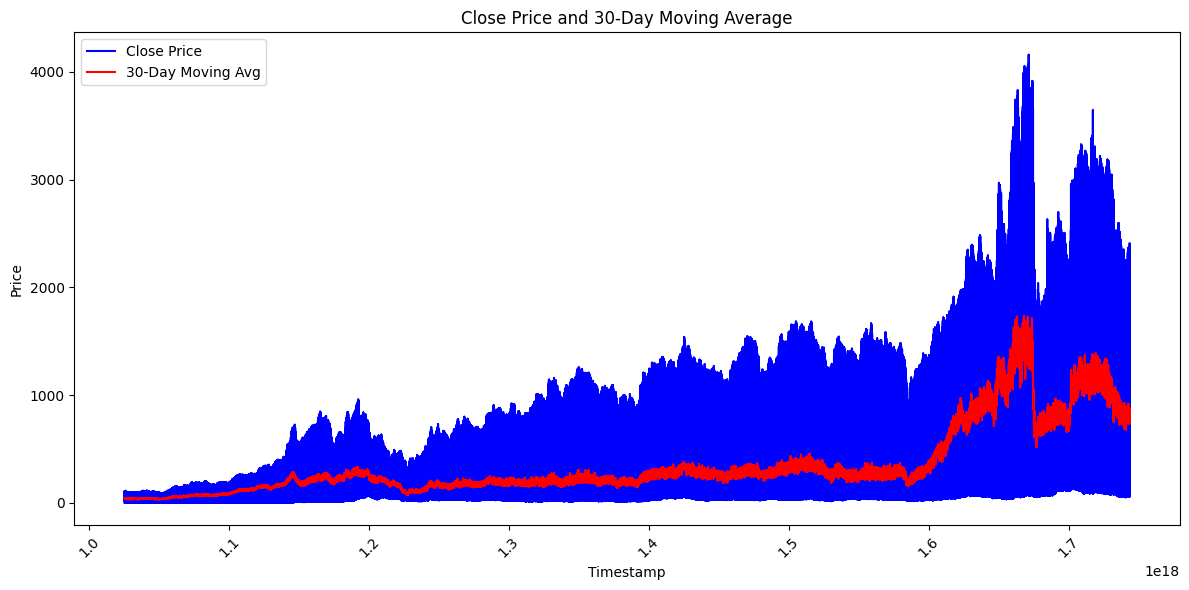

In [14]:
window = 30
df['moving_avg'] = df['close'].rolling(window=window).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Close Price', color='b')
plt.plot(df['timestamp'], df['moving_avg'], label=f'{window}-Day Moving Avg', color='r')
plt.title(f'Close Price and {window}-Day Moving Average')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Daily Price Change

### Candlestick Chart

In [15]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


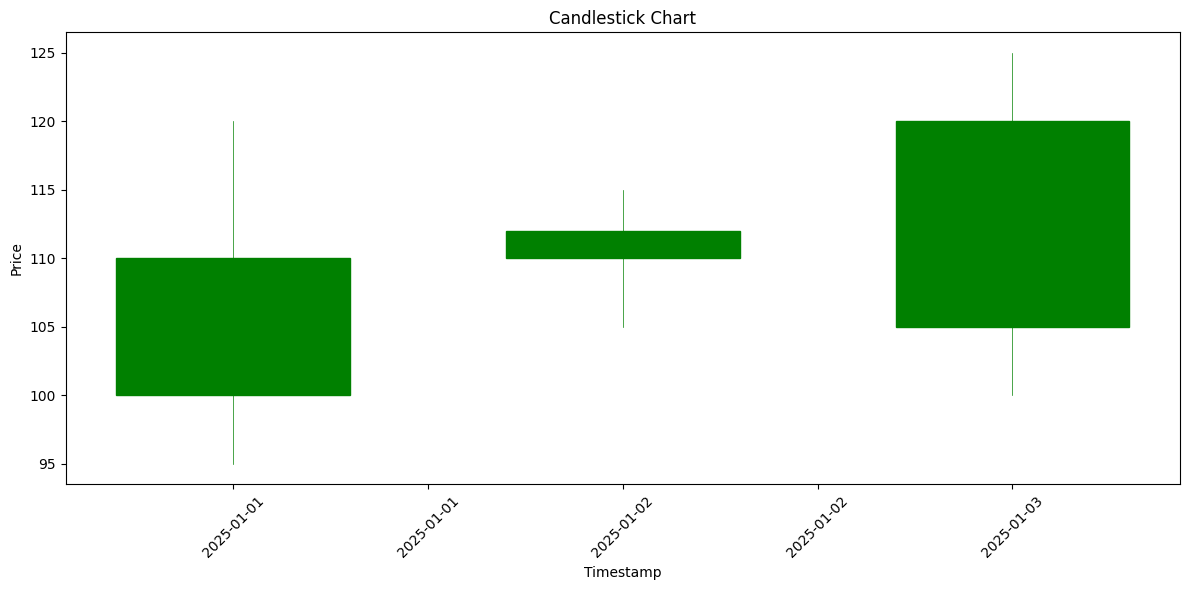

In [17]:
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
data = {
    'timestamp': ['2025-01-01', '2025-01-02', '2025-01-03'],
    'open': [100, 110, 105],
    'high': [120, 115, 125],
    'low': [95, 105, 100],
    'close': [110, 112, 120]
}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

ohlc = df[['timestamp', 'open', 'high', 'low', 'close']].copy()
ohlc['timestamp'] = mdates.date2num(ohlc['timestamp'])

plt.figure(figsize=(12, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Candlestick Chart')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering

In [18]:
df['Moving_Avg_Close'] = df['close'].rolling(window=7).mean()

## Modelling

In [19]:
df.shape

(3, 6)

## Data Preparation & Normalization

In [20]:
X_train = df['close'].values.reshape(-1, 1)
y_train = df['close'].shift(-1).dropna().values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

X_test = test_data['close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

## Reshaping Data

In [21]:
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

## Building a LSTM Model

In [22]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

epochs = 30
batch_size = 15

for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

X_test = test_data['close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [00:05<00:00,  5.07it/s]


## Predictions Using LSTM

In [23]:
lstm_predictions = model.predict(X_test_lstm).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


## Inverse transform of the predictions

In [24]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

## Visualization of LSTM predictions

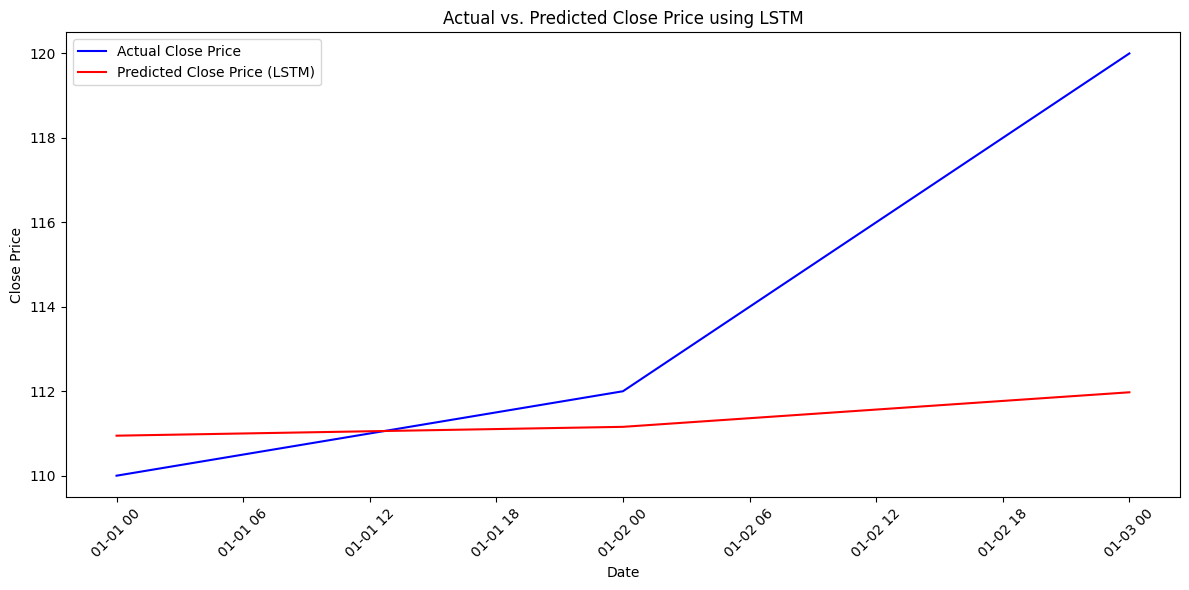

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['timestamp'], test_data['close'], label='Actual Close Price', color='b')
plt.plot(test_data['timestamp'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Mean Absolute Error

In [26]:
lstm_mae = mean_absolute_error(test_data['close'], lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 3.2718379497528076


In [27]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)


date_index = test_data.index[-len(lstm_predictions):]
predictions_df = pd.DataFrame({'timestamp': date_index, 'Predicted_Close': lstm_predictions.flatten()})


predictions_df.to_csv('predictions.csv', index=False)